# Clase 6
### Carlos Eduardo Peña - A00826254

In [1]:
#pip install pandas

In [2]:
#pip install xlrd

In [3]:
#pip install numpy

In [4]:
#pip install openpyxl

In [5]:
#pip install matplotlib

In [6]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [7]:
import pandas as pd

In [8]:
df = pd.read_excel('datasets/mic2.xlsx',
                   engine = 'openpyxl')
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [9]:
def custom_cls(x):
    if(0 <= x <= 20):
        return '<= 20'
    elif(21 <= x <= 30):
        return '21 - 30'
    elif(31 <= x <= 40):
        return '31 - 40'
    else:
        return '=> 40'
    

In [10]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']), axis=1)
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21 - 30


In [11]:
counts = df['AgeGP'].value_counts()
counts = counts.to_frame()
tyoe = (counts)

In [12]:
counts

,AgeGP
21 - 30,31
<= 20,11
31 - 40,5
=> 40,3


In [13]:
counts['%'] = (counts.iloc[:, :]/counts.loc[:, 'AgeGP'].sum(axis=0))*100
counts

,AgeGP,%
21 - 30,31,62.0
<= 20,11,22.0
31 - 40,5,10.0
=> 40,3,6.0


In [14]:
counts = counts.reindex(['<= 20','21 - 30','31 - 40','=> 40'])
counts = counts.reset_index()
counts

,index,AgeGP,%
0,<= 20,11,22.0
1,21 - 30,31,62.0
2,31 - 40,5,10.0
3,=> 40,3,6.0


In [20]:
counts = counts.rename({'index':'Age_Group', 'AgeGP':'Age'},
                       axis = 1)
counts

,Age_Group,Age,%
0,<= 20,11,22.0
1,21 - 30,31,62.0
2,31 - 40,5,10.0
3,=> 40,3,6.0


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Age'>

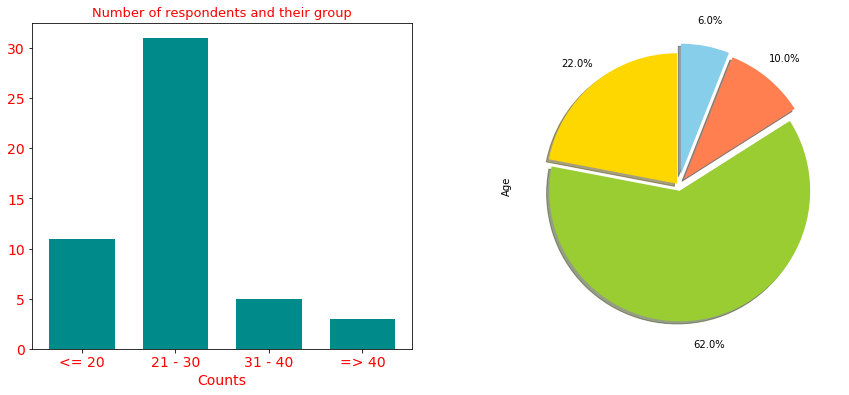

In [21]:
x = list(counts['Age_Group'])
y = list(counts['Age'])

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (10,7)
plt.bar(x,y, width = 0.7, color = 'darkcyan')

plt.xlabel('Age_Group', fontweight = 'regular', color = 'red', fontsize = 14,
           horizontalalignment = 'center')
plt.xlabel('Counts', fontweight = 'regular', color = 'red', fontsize = 14, 
           horizontalalignment = 'center')

plt.xticks(fontsize = 14, color = 'red')
plt.yticks(fontsize = 14, color = 'red')
           
plt.title('Number of respondents and their group', fontsize = 13, color= 'red')

plt.subplot(1,2,2)
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue']

explode_list = [0.02, 0.04, 0.07, 0.09]

counts['Age'].plot(kind = 'pie',
                   figsize = (15, 6),
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.2,
                   shadow = True,
                   startangle = 90,
                   colors = color_list,
                   explode = explode_list
                  )